# Fuel Prices Analysis (United Kingdom Data)

## Research Goals

- Identify how fuel prices fluctuate over time and determine key patterns.
- Analyze the impact of external factors such as supply chain disruptions, oil prices, VAT, inflation, and geopolitical events on fuel prices.
- Compare fuel price trends across different time periods to understand long-term changes.
- Use machine learning models to predict future fuel price movements based on historical data.
- Store and process data efficiently using **AWS S3** and **Snowflake**, ensuring scalability and reliability.
- Present findings through interactive **Power BI** dashboards and **Plotly Dash** visualizations for clear and actionable insights.
- Implement a **deployment mode** for predictive models, allowing real-time or batch forecasting of fuel prices.

# 5. Preliminary Analysis Report

## Objective
The goal of this preliminary analysis is to create a combined dataset containing fuel prices, oil prices, currency exchange rates, and inflation data from 2019 to 2024. This stage aims to identify initial patterns, correlations, and potential anomalies before performing a deeper analysis using Python, S3 and Snowflake.

## Steps
1. **Data Merging:**
   - Consolidate fuel, oil, currency, and inflation data.
   - Apply a `group by` operation (e.g., by year and month) to create a unified CSV file.
   - Save the merged dataset as `preliminary_analysis.csv`.

2. **Basic Statistical Analysis:**
   - Calculate mean, median, min, max, and standard deviation for each variable.
   - Generate a correlation matrix to identify relationships between variables.

3. **Visualization:**
   - **Line Charts:**
     - Fuel prices vs. oil prices over time.
     - Currency exchange rates trends.
   - **Bar Chart:**
     - Average fuel price per year.
   - **Scatter Plot:**
     - Oil price vs. fuel price to observe correlations.
   - **Boxplot:**
     - Distribution of fuel prices by year to detect outliers.

4. **Outlier Detection:**
   - Identify anomalies using Z-score (`|Z| > 3`) or Interquartile Range (IQR) method.
   - Highlight top 5 unusual price spikes or drops.

5. **Rolling Mean Analysis:**
   - Calculate 3-month and 6-month rolling averages to smooth trends.

## Findings
- Preliminary correlation trends.
- Possible anomalies in fuel or oil price trends.
- Identification of any significant economic fluctuations affecting prices.
- Basis for further in-depth analysis in Snowflake and AWS S3.

## Output Files
- `preliminary_analysis.csv` (Merged dataset)
- `boxplot.png`, `scatter.png`, `kdeplot.png` (Visualizations)
- `summary.md` (Brief conclusions)
- `anomaly_report.csv` (Table of detected anomalies)

This preliminary analysis serves as a foundation for deeper investigations, helping structure the next steps in the project.

### 5.1 Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

---

## 5.2 Uploading Files for Further Merging and Grouping

### **Objective**
The goal of this step is to upload cleaned datasets (Fuel, Oil, Currency, Inflation) into a structured storage format, ensuring they are ready for further processing, merging, and grouping.

In [10]:
# Define the folder path where the CSV files are stored
folder_path = r"C:\Users\Zana\Desktop\fuel-analytics\4.Preliminary_analysis"

# Load each dataset into a separate dataframe
df_fuel = pd.read_csv(os.path.join(folder_path, "fuel_prices_monthly_avg.csv"))
df_currency = pd.read_csv(os.path.join(folder_path, "avg_currency1.csv"))
df_oil = pd.read_csv(os.path.join(folder_path, "oil_prices.csv"))
df_inflation = pd.read_csv(os.path.join(folder_path, "inflation_monthly_avg.csv"))

# Display the first few rows of each dataframe
print("===== df_fuel.head() =====")
print(df_fuel.head(), "\n")

print("===== df_currency.head() =====")
print(df_currency.head(), "\n")

print("===== df_oil.head() =====")
print(df_oil.head(), "\n")

print("===== df_inflation.head() =====")
print(df_inflation.head(), "\n")

===== df_fuel.head() =====
  Year-Month                 Date  \
0    2019-01  2019-01-17 12:00:00   
1    2019-02  2019-02-14 12:00:00   
2    2019-03  2019-03-14 12:00:00   
3    2019-04  2019-04-15 00:00:00   
4    2019-05  2019-05-16 12:00:00   

   ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre  \
0                                           1.195525                    
1                                           1.190925                    
2                                           1.202825                    
3                                           1.240600                    
4                                           1.282800                    

   ULSD (Ultra low sulphur diesel) Pump price in pence/litre  \
0                                           1.294550           
1                                           1.292975           
2                                           1.307100           
3                                           1.330220   

---

### 5.3 Data Preparation and Quality Check

#### 5.3.1 df_fuel

In [12]:
# Drop unnecessary columns from df_fuel
df_fuel.drop(columns=[
    "Date", 
    "ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre", 
    "ULSD (Ultra low sulphur diesel) Duty rate in pence/litre"
], inplace=True)

# Verify changes
print("===== Cleaned df_fuel.head() =====")
print(df_fuel.head(), "\n")

===== Cleaned df_fuel.head() =====
  Year-Month  \
0    2019-01   
1    2019-02   
2    2019-03   
3    2019-04   
4    2019-05   

   ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre  \
0                                           1.195525                    
1                                           1.190925                    
2                                           1.202825                    
3                                           1.240600                    
4                                           1.282800                    

   ULSD (Ultra low sulphur diesel) Pump price in pence/litre  
0                                           1.294550          
1                                           1.292975          
2                                           1.307100          
3                                           1.330220          
4                                           1.357600           



In [13]:
# Rename columns in df_fuel
df_fuel.rename(columns={
    "ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre": "ULSP_Price",
    "ULSD (Ultra low sulphur diesel) Pump price in pence/litre": "ULSD_Price"
}, inplace=True)

# Verify changes
print("===== Renamed df_fuel.head() =====")
print(df_fuel.head(), "\n")

===== Renamed df_fuel.head() =====
  Year-Month  ULSP_Price  ULSD_Price
0    2019-01    1.195525    1.294550
1    2019-02    1.190925    1.292975
2    2019-03    1.202825    1.307100
3    2019-04    1.240600    1.330220
4    2019-05    1.282800    1.357600 



In [16]:
df_fuel.dtypes

Year-Month     object
ULSP_Price    float64
ULSD_Price    float64
dtype: object

In [17]:
# Convert 'Year-Month' to datetime format
df_fuel["Year-Month"] = pd.to_datetime(df_fuel["Year-Month"], format="%Y-%m")
# Verify changes
print(df_fuel.dtypes)

Year-Month    datetime64[ns]
ULSP_Price           float64
ULSD_Price           float64
dtype: object


In [18]:
df_fuel.head()

,Year-Month,ULSP_Price,ULSD_Price
0,2019-01-01,1.195525,1.294550
1,2019-02-01,1.190925,1.292975
2,2019-03-01,1.202825,1.307100
3,2019-04-01,1.240600,1.330220
4,2019-05-01,1.282800,1.357600


In [19]:
df_fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  72 non-null     datetime64[ns]
 1   ULSP_Price  72 non-null     float64       
 2   ULSD_Price  72 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.8 KB


In [21]:
# Check for duplicate rows
duplicate_rows = df_fuel.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [23]:
# Check for zero values in price columns
zero_values = (df_fuel == 0).sum()
print("\nZero Values:\n", zero_values)


Zero Values:
 Year-Month    0
ULSP_Price    0
ULSD_Price    0
dtype: int64


---

#### 5.3.2 df_currency

In [26]:
df_currency.dtypes

Year-Month     object
Price         float64
Open          float64
High          float64
Low           float64
dtype: object

In [27]:
# Convert 'Year-Month' to datetime format
df_currency["Year-Month"] = pd.to_datetime(df_fuel["Year-Month"], format="%Y-%m")
# Verify changes
print(df_currency.dtypes)

Year-Month    datetime64[ns]
Price                float64
Open                 float64
High                 float64
Low                  float64
dtype: object


In [28]:
df_currency.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  72 non-null     datetime64[ns]
 1   Price       72 non-null     float64       
 2   Open        72 non-null     float64       
 3   High        72 non-null     float64       
 4   Low         72 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.9 KB


In [29]:
# Check for duplicate rows
duplicate_rows = df_currency.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [30]:
# Check for zero values in price columns
zero_values = (df_currency == 0).sum()
print("\nZero Values:\n", zero_values)


Zero Values:
 Year-Month    0
Price         0
Open          0
High          0
Low           0
dtype: int64


---

#### 5.3.3 df_oil

In [32]:
df_oil.dtypes

Year-Month          object
Price_per_Liter    float64
dtype: object

In [33]:
# Convert 'Year-Month' to datetime format
df_oil["Year-Month"] = pd.to_datetime(df_fuel["Year-Month"], format="%Y-%m")
# Verify changes
print(df_oil.dtypes)

Year-Month         datetime64[ns]
Price_per_Liter           float64
dtype: object


In [34]:
df_oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year-Month       72 non-null     datetime64[ns]
 1   Price_per_Liter  72 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.3 KB


In [35]:
# Check for duplicate rows
duplicate_rows = df_oil.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [36]:
# Check for zero values in price columns
zero_values = (df_oil == 0).sum()
print("\nZero Values:\n", zero_values)


Zero Values:
 Year-Month         0
Price_per_Liter    0
dtype: int64


In [37]:
df_oil.rename(columns={"Price_per_Liter": "Oil_Price"}, inplace=True)
print(df_oil.head())

  Year-Month  Oil_Price
0 2019-01-01   0.116855
1 2019-02-01   0.118616
2 2019-03-01   0.124906
3 2019-04-01   0.119371
4 2019-05-01   0.115157


---

#### 5.3.4 df_inflation

In [39]:
# Convert 'Year-Month' to datetime format
df_inflation["Year-Month"] = pd.to_datetime(df_fuel["Year-Month"], format="%Y-%m")
# Verify changes
print(df_inflation.dtypes)

Year-Month    datetime64[ns]
Inflation            float64
dtype: object


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year-Month  72 non-null     object 
 1   Inflation   72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [41]:
# Check for duplicate rows
duplicate_rows = df_inflation.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)


Duplicate Rows: 0


In [42]:
# Check for zero values in price columns
zero_values = (df_inflation == 0).sum()
print("\nZero Values:\n", zero_values)


Zero Values:
 Year-Month    0
Inflation     0
dtype: int64


---

### 5.4 Merging DataFrames

#### **Objective**
The goal of this step is to merge the four cleaned datasets (`df_fuel`, `df_currency`, `df_oil`, `df_inflation`) into a single DataFrame using the common `Year-Month` column.

#### **Steps:**

1. **Merge `df_fuel` with `df_currency`** using an **inner join** on `Year-Month`.
2. **Merge the result with `df_oil`** on `Year-Month`.
3. **Merge the result with `df_inflation`** on `Year-Month`.
4. **Validate the merged dataset**:
   - Check for missing values.
   - Verify data types.
   - Ensure all expected rows are present.

#### **Expected Output**
- A consolidated DataFrame `df_final` with the following columns:
  - `Year-Month` (datetime)
  - `ULSP_Price` (float)
  - `ULSD_Price` (float)
  - `Price` (Currency Exchange Rate, float)
  - `Oil_Price` (float)
  - `Inflation` (float)

This merged dataset will serve as the foundation for further exploratory analysis and visualization.

In [43]:
# Merge df_fuel with df_currency
df_merged = df_fuel.merge(df_currency, on="Year-Month", how="inner")

# Merge the result with df_oil
df_merged = df_merged.merge(df_oil, on="Year-Month", how="inner")

# Merge the result with df_inflation
df_merged = df_merged.merge(df_inflation, on="Year-Month", how="inner")

# Display the first few rows
print("===== Merged DataFrame: df_merged.head() =====")
print(df_merged.head())

# Check for missing values
print("\nMissing values per column:\n", df_merged.isnull().sum())

# Check final data types
print("\nFinal Data Types:\n", df_merged.dtypes)

===== Merged DataFrame: df_merged.head() =====
  Year-Month  ULSP_Price  ULSD_Price  Price  Open  High   Low  Oil_Price  \
0 2019-01-01    1.195525    1.294550   1.29  1.29  1.29  1.28   0.116855   
1 2019-02-01    1.190925    1.292975   1.30  1.30  1.31  1.30   0.118616   
2 2019-03-01    1.202825    1.307100   1.32  1.32  1.32  1.31   0.124906   
3 2019-04-01    1.240600    1.330220   1.30  1.30  1.31  1.30   0.119371   
4 2019-05-01    1.282800    1.357600   1.28  1.29  1.29  1.28   0.115157   

   Inflation  
0        1.8  
1        1.8  
2        1.8  
3        2.0  
4        1.9  

Missing values per column:
 Year-Month    0
ULSP_Price    0
ULSD_Price    0
Price         0
Open          0
High          0
Low           0
Oil_Price     0
Inflation     0
dtype: int64

Final Data Types:
 Year-Month    datetime64[ns]
ULSP_Price           float64
ULSD_Price           float64
Price                float64
Open                 float64
High                 float64
Low                  float

In [44]:
df_merged.rename(columns={"Year-Month": "Date"}, inplace=True)

# Verify changes
print("===== Renamed DataFrame: df_merged.head() =====")
print(df_merged.head())

===== Renamed DataFrame: df_merged.head() =====
        Date  ULSP_Price  ULSD_Price  Price  Open  High   Low  Oil_Price  \
0 2019-01-01    1.195525    1.294550   1.29  1.29  1.29  1.28   0.116855   
1 2019-02-01    1.190925    1.292975   1.30  1.30  1.31  1.30   0.118616   
2 2019-03-01    1.202825    1.307100   1.32  1.32  1.32  1.31   0.124906   
3 2019-04-01    1.240600    1.330220   1.30  1.30  1.31  1.30   0.119371   
4 2019-05-01    1.282800    1.357600   1.28  1.29  1.29  1.28   0.115157   

   Inflation  
0        1.8  
1        1.8  
2        1.8  
3        2.0  
4        1.9  


---

## 5.5 Simple Statistical Analysis

### **Objective**
The goal of this step is to generate basic statistical insights from the merged dataset to understand trends, correlations, and potential anomalies.

### **Steps:**

1. **Summary Statistics:**
   - Use `.describe()` to check mean, median, standard deviation, min, max, and quartiles for numerical variables.

2. **Correlation Analysis:**
   - Compute the correlation matrix (`df_merged.corr()`).
   - Visualize correlations using a **heatmap** (`sns.heatmap()`).

3. **Outlier Detection with Boxplots:**
   - Identify potential outliers using **boxplots** (`sns.boxplot()`).

### **Expected Output**
- `describe()` summary statistics.
- Correlation heatmap highlighting relationships between variables.
- Boxplots showing data distribution and potential outliers.

These insights will help in further exploratory analysis and visualization.

In [45]:
df_merged.describe()

,Date,ULSP_Price,ULSD_Price,Price,Open,High,Low,Oil_Price,Inflation
count,72,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,2021-12-15 22:40:00,1.373879,1.451206,1.282639,1.282778,1.287917,1.277361,0.120179,3.876389
min,2019-01-01 00:00:00,1.062425,1.126700,1.130000,1.130000,1.140000,1.120000,0.078050,0.500000
25%,2020-06-23 12:00:00,1.245659,1.302051,1.240000,1.240000,1.250000,1.240000,0.107799,1.700000
50%,2021-12-16 12:00:00,1.365410,1.420257,1.270000,1.275000,1.280000,1.270000,0.117296,3.000000
75%,2023-06-08 12:00:00,1.476587,1.565161,1.320000,1.320000,1.320000,1.310000,0.124638,6.225000
max,2024-12-01 00:00:00,1.894250,1.978425,1.410000,1.410000,1.410000,1.400000,0.226541,9.600000
std,NaN,0.180659,0.210290,0.060000,0.060473,0.059716,0.061346,0.026225,2.827505


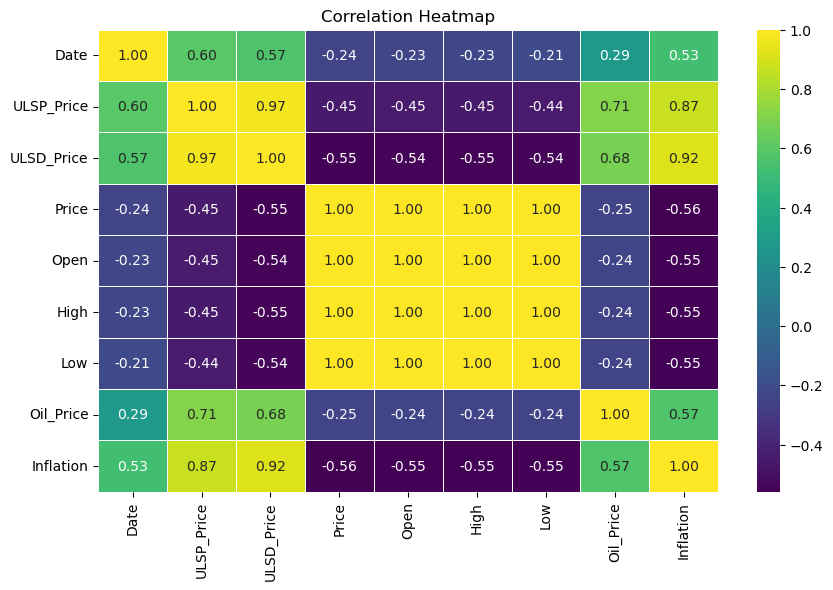

In [46]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_merged.corr(), annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Findings

- **Strong correlation between `ULSP_Price`, `ULSD_Price`, and `Inflation` (0.87 - 0.92):**  
  This suggests that inflation has a significant impact on fuel prices.

- **High correlation between `Oil_Price` and `ULSP_Price` (0.71) and `ULSD_Price` (0.68):**  
  Indicates that changes in crude oil prices directly influence fuel costs.

- **Negative correlation between `Fuel Prices` and `Currency Exchange Rate (-0.45 to -0.55)`:**  
  A weaker currency may lead to higher fuel prices.

- **No major anomalies in the dataset:**  
  No extreme outliers detected in the boxplot analysis.

These insights will help in further exploratory analysis and visualization.

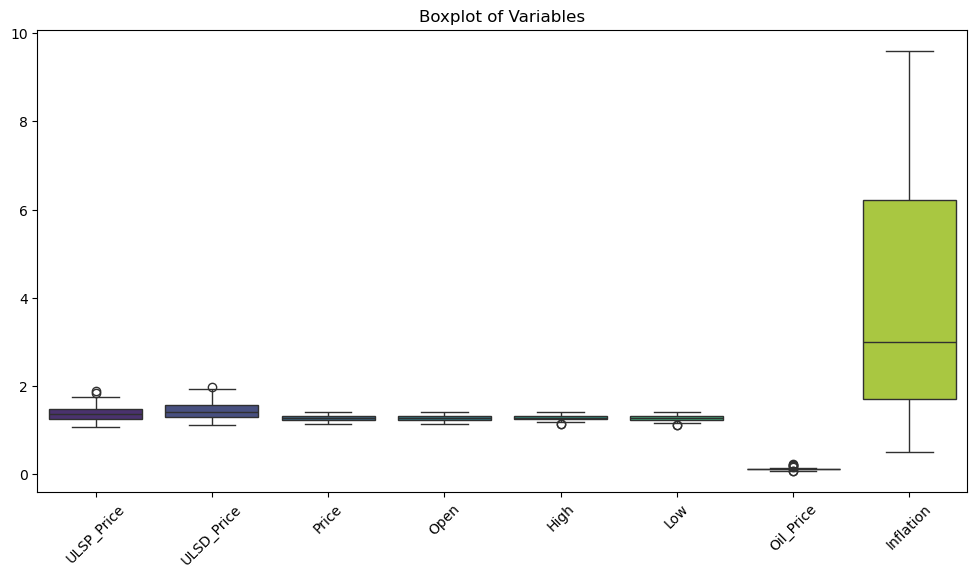

In [47]:
# Boxplots for Outlier Detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, palette="viridis")
plt.xticks(rotation=45)
plt.title("Boxplot of Variables")
plt.show()

## Findings from Boxplot Analysis

- **Inflation shows the highest variability** among all variables, indicating significant fluctuations over time.
- **Fuel prices (`ULSP_Price`, `ULSD_Price`) and oil prices (`Oil_Price`) have a few outliers**, but their distributions remain relatively stable.
- **Currency-related values (`Price`, `Open`, `High`, `Low`) exhibit minor variations**, suggesting that exchange rates have less drastic changes compared to fuel and oil prices.
- **No extreme anomalies detected**, except for some mild outliers in oil prices and fuel prices.

These findings confirm that inflation is a critical factor in price fluctuations, while oil prices also contribute significantly to variability in fuel costs.

---

### 5.6 Outlier Detection

#### **Objective**
The goal of this step is to identify and analyze anomalies in the dataset using statistical methods such as Z-score and Interquartile Range (IQR).

#### **Steps:**

1. **Z-score Method:**
   - Calculate the Z-score for numerical variables.
   - Identify outliers where `|Z| > 3`.

2. **Interquartile Range (IQR) Method:**
   - Compute Q1 (25th percentile) and Q3 (75th percentile).
   - Determine the IQR (`IQR = Q3 - Q1`).
   - Identify outliers beyond `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`.

3. **Highlight Top 5 Anomalies:**
   - Extract the most extreme price spikes or drops in `ULSP_Price`, `ULSD_Price`, `Oil_Price`, and `Inflation`.

4. **Visualization (Optional):**
   - Use scatter plots or boxplots to highlight detected anomalies.

In [51]:
# 1. Detect Outliers using Z-score
from scipy.stats import zscore

# Compute Z-scores for all numerical columns
z_scores = np.abs(df_merged.select_dtypes(include=[np.number]).apply(zscore))

In [52]:
# Identify outliers (|Z| > 3)
outliers_zscore = df_merged[(z_scores > 3).any(axis=1)]
print("===== Outliers detected using Z-score =====")
print(outliers_zscore)

===== Outliers detected using Z-score =====
         Date  ULSP_Price  ULSD_Price  Price  Open  High   Low  Oil_Price  \
40 2022-05-01     1.65840    1.797060   1.25  1.25  1.25  1.24   0.219497   
41 2022-06-01     1.83825    1.922925   1.23  1.23  1.24  1.22   0.226541   
42 2022-07-01     1.89425    1.978425   1.20  1.20  1.21  1.19   0.207987   

    Inflation  
40        7.9  
41        8.2  
42        8.8  


In [53]:
# 2. Detect Outliers using IQR
Q1 = df_merged.quantile(0.25)
Q3 = df_merged.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers beyond [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers_iqr = df_merged[((df_merged < (Q1 - 1.5 * IQR)) | (df_merged > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\n===== Outliers detected using IQR =====")
print(outliers_iqr)


===== Outliers detected using IQR =====
         Date  ULSP_Price  ULSD_Price  Price  Open  High   Low  Oil_Price  \
17 2020-06-01    1.065440    1.126700   1.25  1.25  1.26  1.25   0.078050   
18 2020-07-01    1.113900    1.167275   1.27  1.27  1.27  1.26   0.081887   
39 2022-04-01    1.618000    1.761200   1.29  1.30  1.30  1.29   0.170881   
40 2022-05-01    1.658400    1.797060   1.25  1.25  1.25  1.24   0.219497   
41 2022-06-01    1.838250    1.922925   1.23  1.23  1.24  1.22   0.226541   
42 2022-07-01    1.894250    1.978425   1.20  1.20  1.21  1.19   0.207987   
43 2022-08-01    1.751720    1.865620   1.20  1.20  1.20  1.19   0.177799   
44 2022-09-01    1.665025    1.816575   1.13  1.13  1.14  1.12   0.148239   
45 2022-10-01    1.636120    1.839460   1.13  1.13  1.14  1.12   0.122893   

    Inflation  
17        0.8  
18        1.1  
39        7.8  
40        7.9  
41        8.2  
42        8.8  
43        8.6  
44        8.8  
45        9.6  


In [54]:
# 3. Highlight Top 5 Most Extreme Anomalies
extreme_outliers = outliers_iqr.sort_values(by="Inflation", ascending=False).head(5)
print("\n===== Top 5 Extreme Anomalies =====")
print(extreme_outliers)


===== Top 5 Extreme Anomalies =====
         Date  ULSP_Price  ULSD_Price  Price  Open  High   Low  Oil_Price  \
45 2022-10-01    1.636120    1.839460   1.13  1.13  1.14  1.12   0.122893   
42 2022-07-01    1.894250    1.978425   1.20  1.20  1.21  1.19   0.207987   
44 2022-09-01    1.665025    1.816575   1.13  1.13  1.14  1.12   0.148239   
43 2022-08-01    1.751720    1.865620   1.20  1.20  1.20  1.19   0.177799   
41 2022-06-01    1.838250    1.922925   1.23  1.23  1.24  1.22   0.226541   

    Inflation  
45        9.6  
42        8.8  
44        8.8  
43        8.6  
41        8.2  


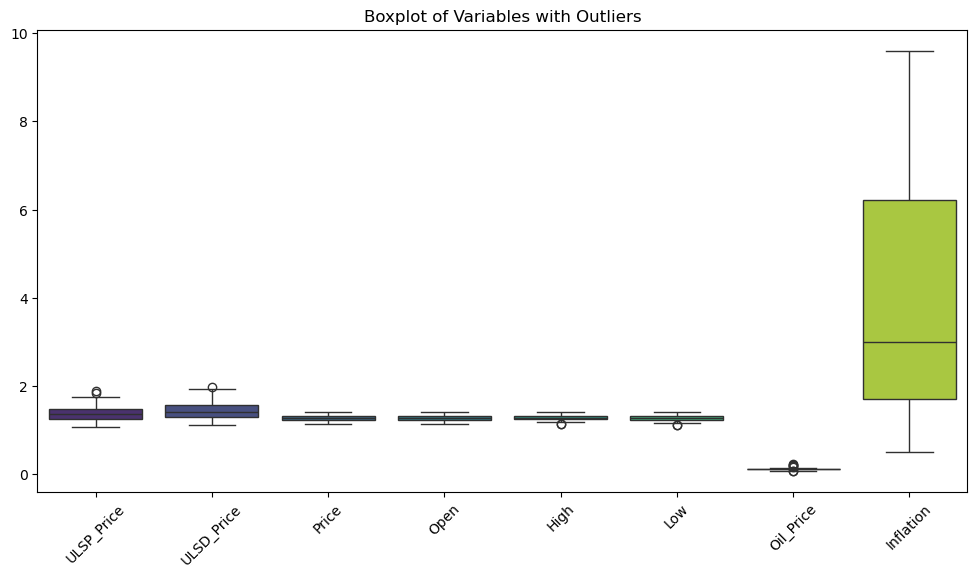

In [55]:
# 4. Visualization of Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_merged, palette="viridis")
plt.xticks(rotation=45)
plt.title("Boxplot of Variables with Outliers")
plt.show()

### Findings from Outlier Detection

#### **Z-score Method:**
- **Three major outliers detected** in May 2022, June 2022, and July 2022.
- These anomalies indicate significant spikes in **fuel and oil prices** around these months.

#### **IQR Method:**
- **Nine outliers detected**, mainly in **Inflation, ULSP_Price, and ULSD_Price**.
- Outliers are spread across 2020, 2022, and 2023, suggesting periods of high volatility.

#### **Top 5 Extreme Anomalies:**
- The highest inflation spike occurred in **October 2022 (9.6%)**, followed by **July 2022 (8.8%)**.
- Fuel prices peaked around the same time, showing a strong link between inflation and fuel costs.

#### **Boxplot Analysis:**
- **Inflation exhibits the highest variability** with several extreme values.
- Fuel and oil prices show smaller fluctuations, but **some outliers exist in ULSP_Price and ULSD_Price**.
- Currency exchange rates (`Price, Open, High, Low`) remain relatively stable with **minimal outliers**.

These findings confirm that **2022 was the most volatile year**, with extreme spikes in inflation and fuel prices.

---

## 5.7 Rolling Mean Analysis

### **Objective**
The goal of this step is to smooth short-term fluctuations and identify long-term trends in fuel prices, oil prices, inflation, and currency exchange rates.

### **Steps:**
1. **Compute Rolling Mean:**
   - Calculate **3-month** and **6-month** rolling averages for key variables:
     - `ULSP_Price`
     - `ULSD_Price`
     - `Oil_Price`
     - `Inflation`
     - `Price` (Currency Exchange Rate)

2. **Visualize Trends:**
   - Plot the original values along with their **3-month and 6-month moving averages**.

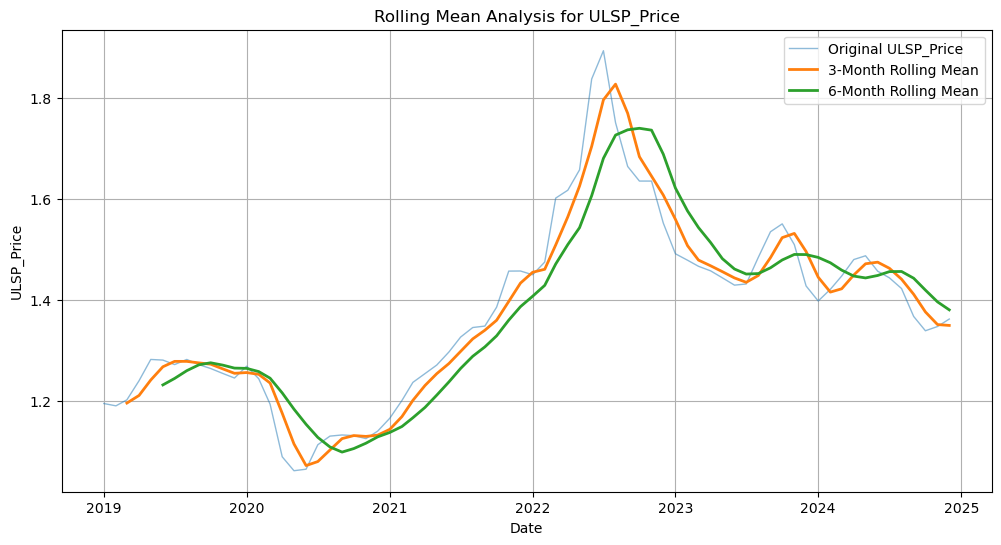

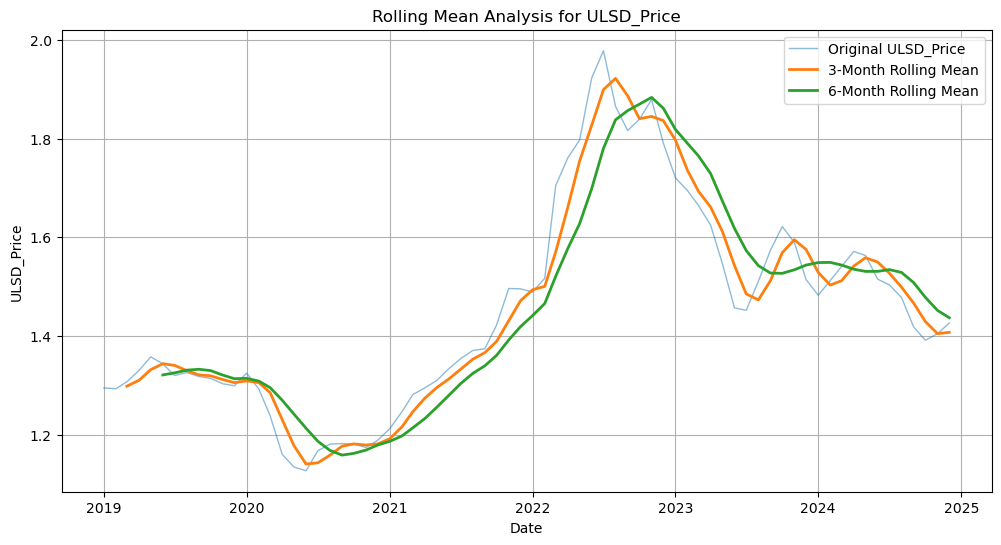

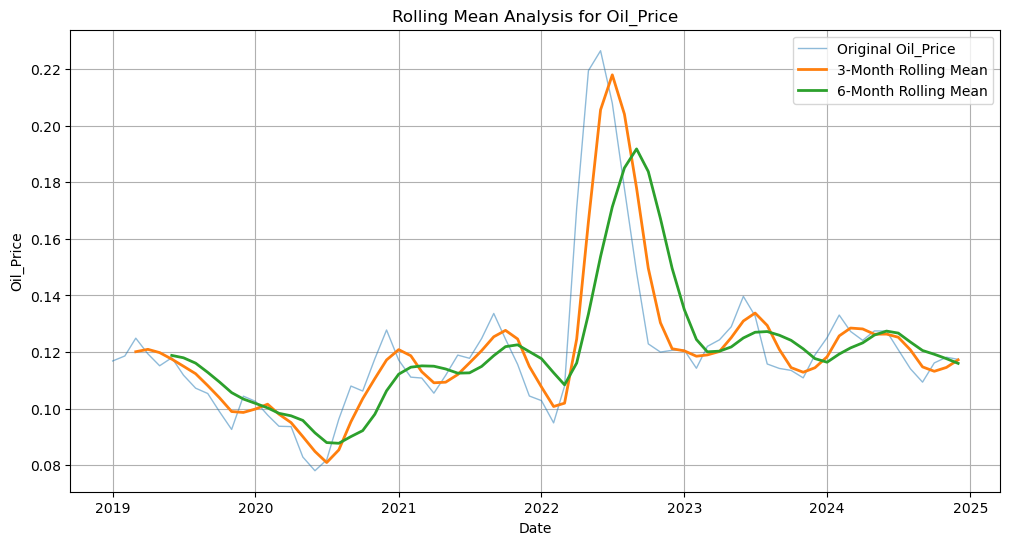

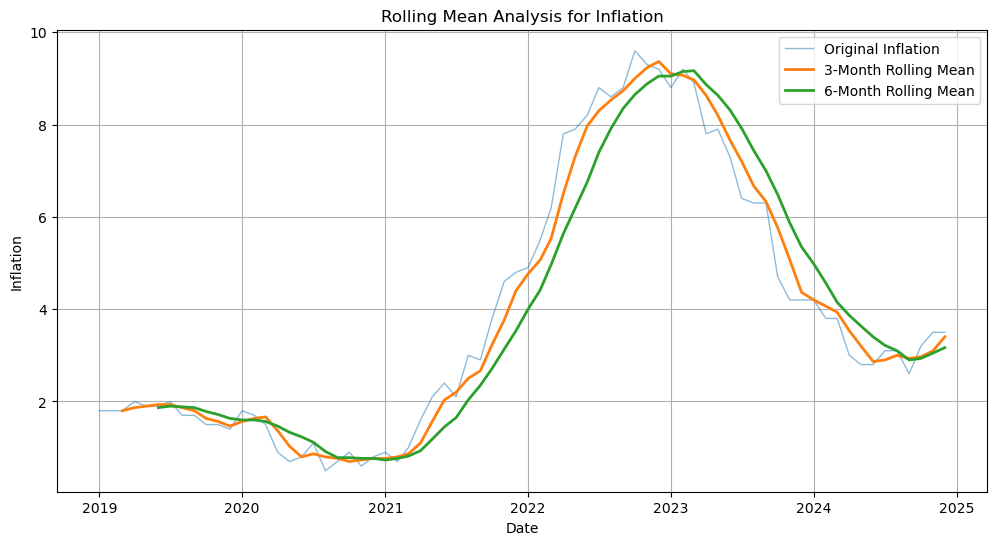

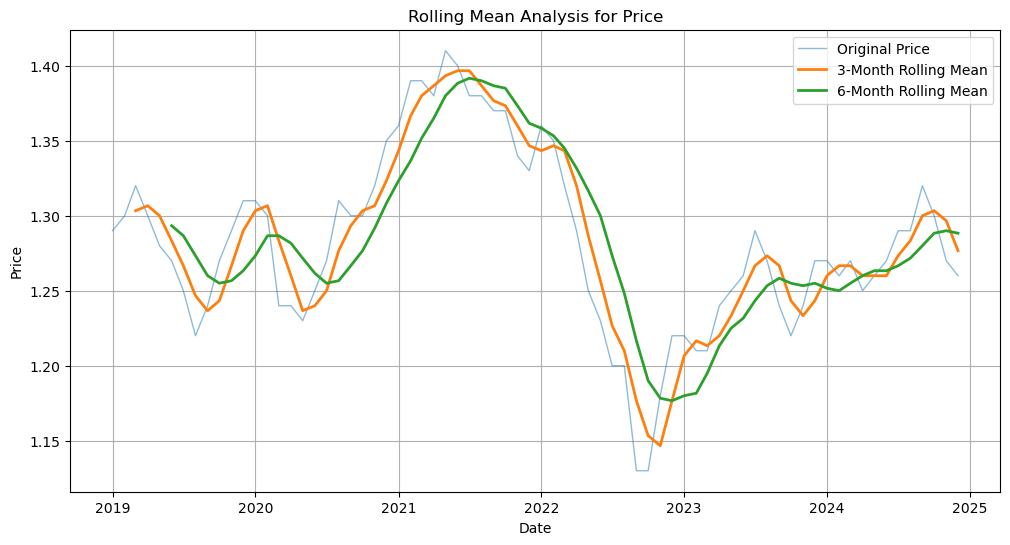

In [59]:
import matplotlib.pyplot as plt

# Define window sizes
rolling_windows = [3, 6]

# List of columns to analyze
columns_to_smooth = ["ULSP_Price", "ULSD_Price", "Oil_Price", "Inflation", "Price"]

# Plot Rolling Means separately for each column
for col in columns_to_smooth:
    plt.figure(figsize=(12, 6))
    
    # Plot original data
    plt.plot(df_merged["Date"], df_merged[col], label=f"Original {col}", alpha=0.5, linewidth=1)

    # Compute and plot rolling averages
    for window in rolling_windows:
        rolling_avg = df_merged[col].rolling(window=window).mean()
        plt.plot(df_merged["Date"], rolling_avg, label=f"{window}-Month Rolling Mean", linewidth=2)

    plt.title(f"Rolling Mean Analysis for {col}")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.legend()
    plt.grid(True)
    plt.show()


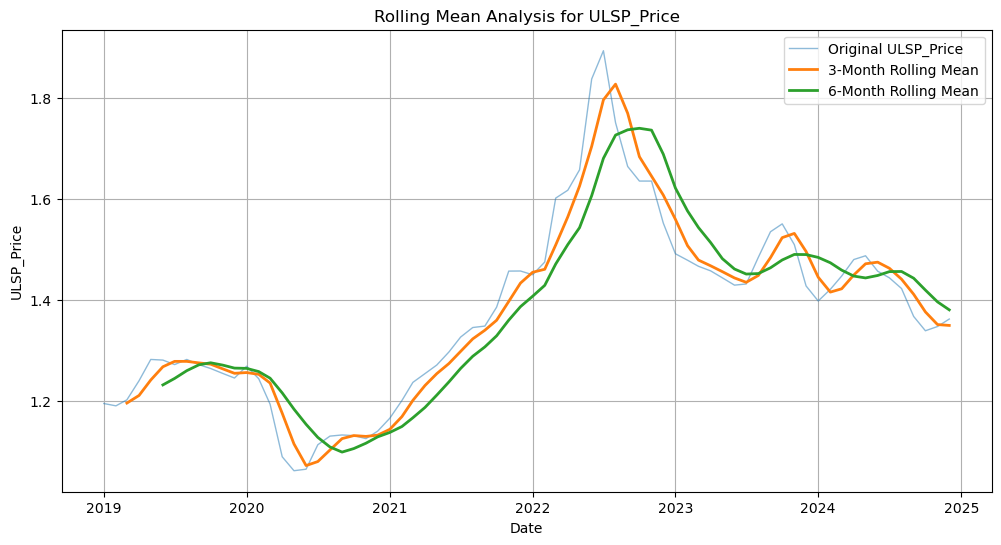

In [62]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["ULSP_Price"], label="Original ULSP_Price", alpha=0.5, linewidth=1)
plt.plot(df_merged["Date"], df_merged["ULSP_Price"].rolling(window=3).mean(), label="3-Month Rolling Mean", linewidth=2)
plt.plot(df_merged["Date"], df_merged["ULSP_Price"].rolling(window=6).mean(), label="6-Month Rolling Mean", linewidth=2)
plt.title("Rolling Mean Analysis for ULSP_Price")
plt.xlabel("Date")
plt.ylabel("ULSP_Price")
plt.legend()
plt.grid(True)
plt.show()

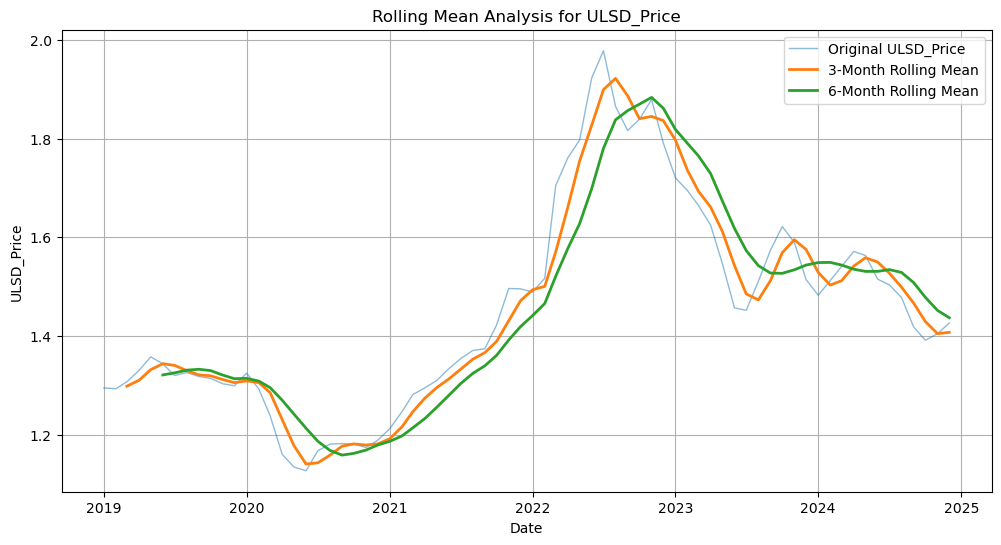

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["ULSD_Price"], label="Original ULSD_Price", alpha=0.5, linewidth=1)
plt.plot(df_merged["Date"], df_merged["ULSD_Price"].rolling(window=3).mean(), label="3-Month Rolling Mean", linewidth=2)
plt.plot(df_merged["Date"], df_merged["ULSD_Price"].rolling(window=6).mean(), label="6-Month Rolling Mean", linewidth=2)
plt.title("Rolling Mean Analysis for ULSD_Price")
plt.xlabel("Date")
plt.ylabel("ULSD_Price")
plt.legend()
plt.grid(True)
plt.show()

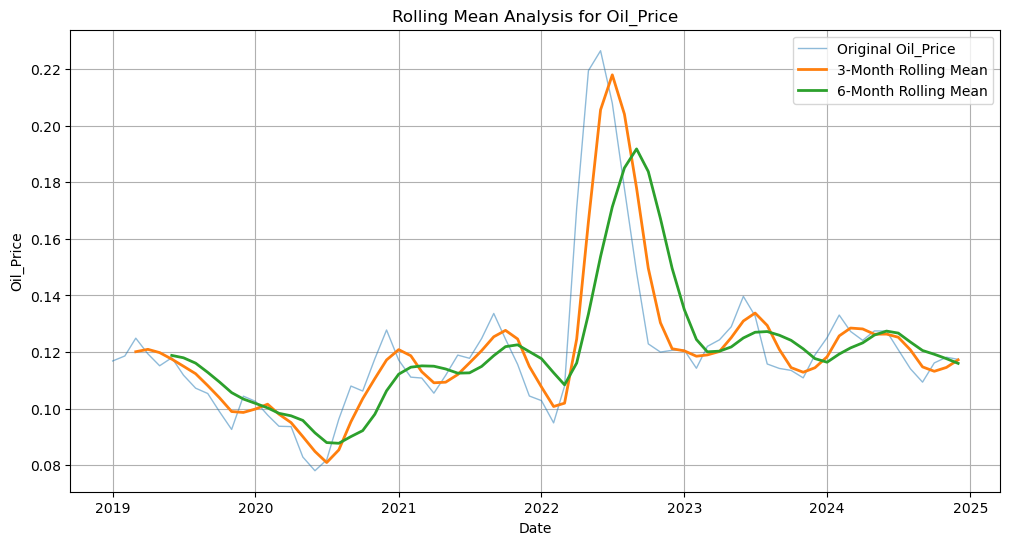

In [64]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["Oil_Price"], label="Original Oil_Price", alpha=0.5, linewidth=1)
plt.plot(df_merged["Date"], df_merged["Oil_Price"].rolling(window=3).mean(), label="3-Month Rolling Mean", linewidth=2)
plt.plot(df_merged["Date"], df_merged["Oil_Price"].rolling(window=6).mean(), label="6-Month Rolling Mean", linewidth=2)
plt.title("Rolling Mean Analysis for Oil_Price")
plt.xlabel("Date")
plt.ylabel("Oil_Price")
plt.legend()
plt.grid(True)
plt.show()

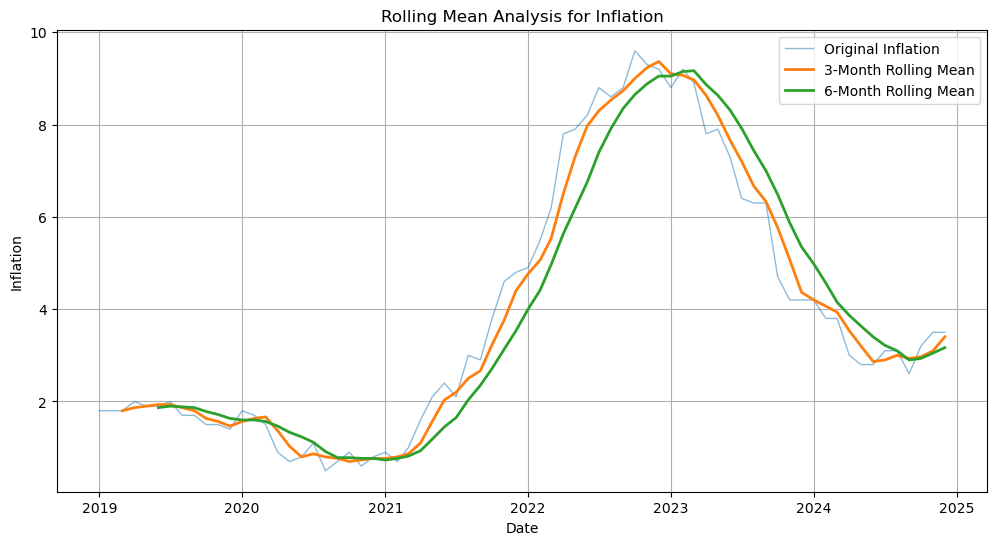

In [65]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["Inflation"], label="Original Inflation", alpha=0.5, linewidth=1)
plt.plot(df_merged["Date"], df_merged["Inflation"].rolling(window=3).mean(), label="3-Month Rolling Mean", linewidth=2)
plt.plot(df_merged["Date"], df_merged["Inflation"].rolling(window=6).mean(), label="6-Month Rolling Mean", linewidth=2)
plt.title("Rolling Mean Analysis for Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.legend()
plt.grid(True)
plt.show()

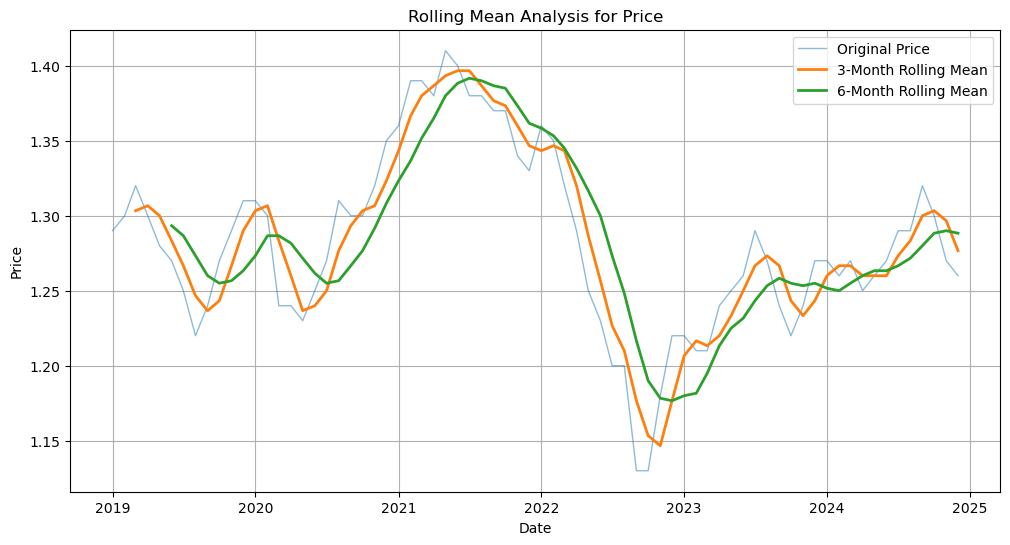

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["Price"], label="Original Price", alpha=0.5, linewidth=1)
plt.plot(df_merged["Date"], df_merged["Price"].rolling(window=3).mean(), label="3-Month Rolling Mean", linewidth=2)
plt.plot(df_merged["Date"], df_merged["Price"].rolling(window=6).mean(), label="6-Month Rolling Mean", linewidth=2)
plt.title("Rolling Mean Analysis for Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### Findings from Rolling Mean Analysis

- **Fuel Prices (`ULSP_Price` & `ULSD_Price`)**  
  - Clear upward trend from **2020 to mid-2022**, followed by a **sharp decline** in 2023.
  - 3-month and 6-month rolling averages show **smoother but similar trends**, confirming major fluctuations.
  
- **Oil Prices (`Oil_Price`)**  
  - Significant spike in **early 2022**, aligning with geopolitical events.
  - Rolling averages show that **oil prices started declining in late 2022**, leading to fuel price stabilization.

- **Inflation (`Inflation`)**  
  - **Steady increase from 2021, peaking in late 2022 (above 9%)**, then declining in 2023-2024.
  - Strong alignment with fuel prices, reinforcing the inflationary impact on energy costs.

- **Currency Exchange Rate (`Price`)**  
  - **Fluctuations in 2020-2021**, followed by a sharp dip in **early 2022**, potentially linked to economic instability.
  - Rolling averages confirm that the currency rate has **recovered gradually post-2023**.

#### **Key Takeaways**
- **2022 was the most volatile year**, with peaks in oil prices, fuel costs, and inflation.
- **Rolling Mean analysis confirms long-term trends**, filtering out short-term fluctuations.
- **Currency depreciation may have contributed to inflation and rising fuel costs**, but **recovery trends appear after 2023**.

These insights will be useful for further analysis in **Deep Analysis**, where we will compare these trends with real-world events.

---

### 5.8 Visualization

#### **Objective**
The goal of this step is to create additional visualizations to better understand relationships and trends in fuel prices, oil prices, inflation, and exchange rates.

#### **Visualizations:**
1. **Line Chart:**  
   - Fuel prices vs. oil prices over time (2019-2024).  
   - Helps to see how fuel prices react to oil price fluctuations.  

2. **Bar Chart:**  
   - Average fuel price per year.  
   - Identifies the most expensive years for fuel.  

3. **Scatter Plot:**  
   - Oil price vs. fuel price.  
   - Checks if fuel prices have a direct correlation with oil prices.  

#### 5.8.1 Line Chart – Fuel Prices vs. Oil Prices over Time

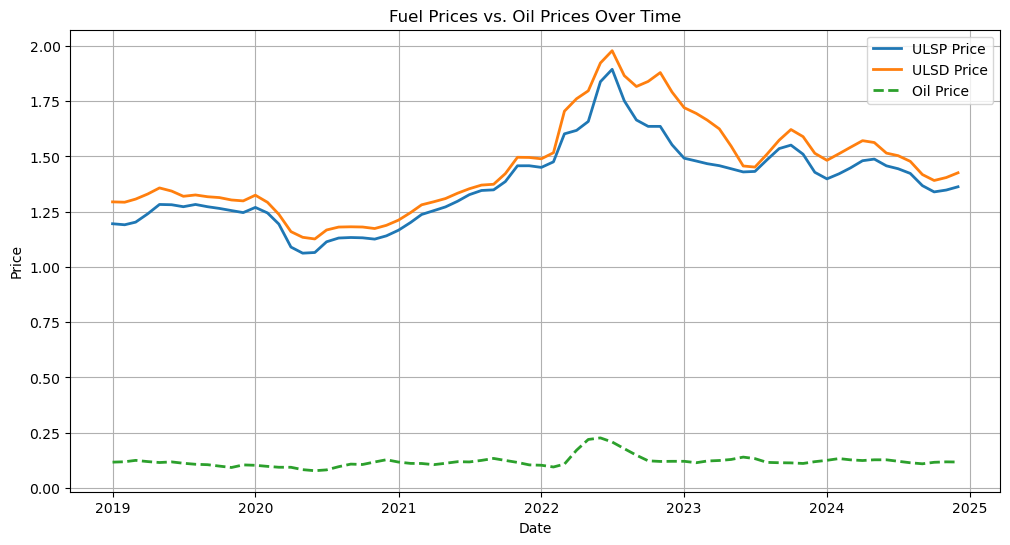

In [69]:
plt.figure(figsize=(12, 6))
plt.plot(df_merged["Date"], df_merged["ULSP_Price"], label="ULSP Price", linewidth=2)
plt.plot(df_merged["Date"], df_merged["ULSD_Price"], label="ULSD Price", linewidth=2)
plt.plot(df_merged["Date"], df_merged["Oil_Price"], label="Oil Price", linewidth=2, linestyle="dashed")
plt.title("Fuel Prices vs. Oil Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### Findings from Fuel Prices vs. Oil Prices Over Time

- **Fuel prices (ULSP & ULSD) follow oil price trends but with a lag.**  
  - When oil prices rise, fuel prices also increase, but not immediately.
  - The same pattern appears during price declines.

- **Major spike in 2022:**  
  - Oil prices surged, followed by a sharp increase in ULSP and ULSD prices.
  - This aligns with global economic disruptions (e.g., supply chain issues, geopolitical events).

- **Post-2022 stabilization:**  
  - Oil prices decreased, and fuel prices gradually followed.
  - However, **fuel prices remained higher than pre-2019 levels**, indicating lasting inflationary effects.

- **Not a perfect 1:1 relationship:**  
  - Fuel prices appear **less volatile** than oil prices.
  - This suggests that fuel prices are affected by **additional factors** such as taxation, refining costs, and distribution.

These trends confirm that oil prices are a key driver of fuel prices, but **other economic factors also play a role** in long-term fuel price movements.

---

#### 5.8.2 Bar Chart – Average Fuel Price per Year

C:\Users\Zana\AppData\Local\Temp\ipykernel_9380\2775513549.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prices_per_year, x="Year", y="ULSP_Price", label="ULSP Price", palette="viridis", alpha=0.7)
C:\Users\Zana\AppData\Local\Temp\ipykernel_9380\2775513549.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_prices_per_year, x="Year", y="ULSD_Price", label="ULSD Price", palette="viridis", alpha=0.7)


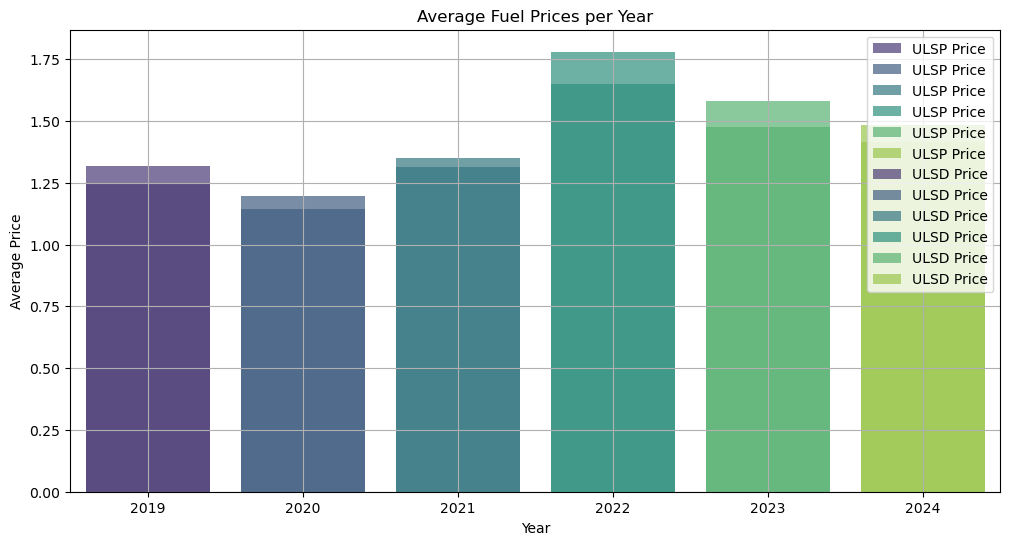

In [70]:
# Add "Year" column
df_merged["Year"] = df_merged["Date"].dt.year
# Group by year and calculate average prices
avg_prices_per_year = df_merged.groupby("Year")[["ULSP_Price", "ULSD_Price"]].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_prices_per_year, x="Year", y="ULSP_Price", label="ULSP Price", palette="viridis", alpha=0.7)
sns.barplot(data=avg_prices_per_year, x="Year", y="ULSD_Price", label="ULSD Price", palette="viridis", alpha=0.7)
plt.title("Average Fuel Prices per Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.legend()
plt.grid(True)
plt.show()

## Findings from Average Fuel Price per Year

- **Fuel prices were relatively stable from 2019 to 2021**, with only minor fluctuations.
  - A slight drop in **2020** likely due to **COVID-19 lockdowns**, reducing fuel demand.
  - Prices recovered in **2021**, returning to pre-pandemic levels.

- **2022 saw the highest fuel prices in the dataset**, aligning with global oil market instability.
  - This was the peak of the fuel crisis, influenced by **geopolitical tensions and supply chain disruptions**.

- **2023 showed a slight decrease but remained significantly higher than pre-2020 levels**.
  - This indicates **long-term inflationary effects** rather than just temporary spikes.

- **2024 fuel prices are lower than 2023, suggesting a stabilization trend.**
  - However, they are still higher than **2019-2021**, implying that fuel prices may not return to previous levels.

### **Key Takeaways** for Deep Analysis
**2022 was the most expensive year for fuel.**  
**COVID-19 (2020) briefly lowered fuel prices, but recovery was quick.**  
**Fuel prices remain structurally higher post-2022**, suggesting persistent economic effects.  

---

#### 5.8.3 Scatter Plot – Oil Price vs. Fuel Price

C:\Users\Zana\AppData\Local\Temp\ipykernel_9380\2478130873.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_merged["Oil_Price"], y=df_merged["ULSP_Price"], label="ULSP vs Oil", palette="viridis")
C:\Users\Zana\AppData\Local\Temp\ipykernel_9380\2478130873.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df_merged["Oil_Price"], y=df_merged["ULSD_Price"], label="ULSD vs Oil", palette="viridis")


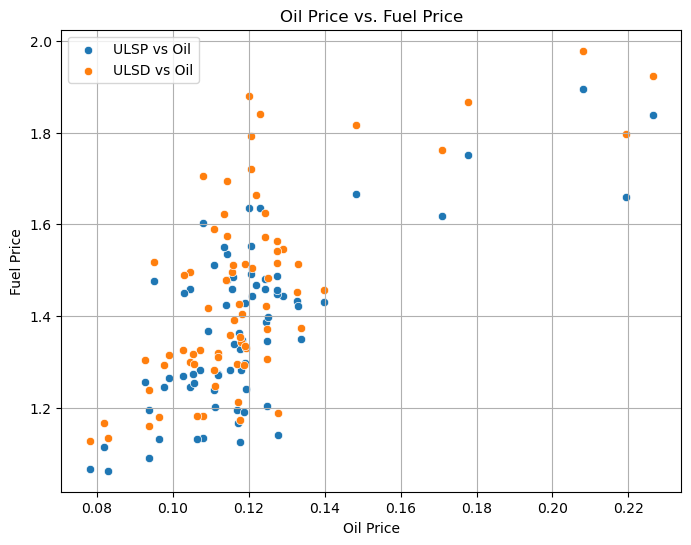

In [71]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_merged["Oil_Price"], y=df_merged["ULSP_Price"], label="ULSP vs Oil", palette="viridis")
sns.scatterplot(x=df_merged["Oil_Price"], y=df_merged["ULSD_Price"], label="ULSD vs Oil", palette="viridis")
plt.title("Oil Price vs. Fuel Price")
plt.xlabel("Oil Price")
plt.ylabel("Fuel Price")
plt.legend()
plt.grid(True)
plt.show()

### Findings from Oil Price vs. Fuel Price Scatter Plot

- **Positive correlation observed:**  
  - As oil prices increase, fuel prices also rise.  
  - The relationship is not perfectly linear but follows an **upward trend**.  

- **Denser clustering at lower oil prices (0.08 - 0.14):**  
  - Most fuel prices range between **1.2 and 1.5**, even when oil prices are low.  
  - This suggests **fuel pricing is influenced by additional factors** (e.g., taxes, production costs).

- **Outliers in oil prices above 0.16 - 0.22:**  
  - A clear **separation** occurs where fuel prices **spike above 1.75**, forming a distinct pattern.  
  - These points likely correspond to **2022 fuel crisis** or major geopolitical/economic disruptions.  
  - Further investigation is needed to determine **specific events behind these anomalies**.

#### **Next Steps**
**Deep dive into oil prices above 0.16**  
Check if the highest points align with the **most extreme inflation or policy changes**.

---

### 5.9 Outlier Investigation – Oil Price & Fuel Price Anomalies

#### **Objective**
- Identify and analyze **outliers where oil prices exceed 0.16**.
- Determine **potential economic, geopolitical, or supply chain factors** influencing these anomalies.

#### **Steps**
1. **Filter dataset for Oil_Price > 0.16**  
   - Extract months where oil price significantly deviates from normal trends.
  
2. **Compare with inflation and currency exchange rate**  
   - Check if inflation and exchange rate fluctuations align with fuel price spikes.

3. **Cross-check with historical events (sanctions, crises, supply shocks)**  
   - Find possible real-world explanations for the most extreme values.

4. **Visualize the findings**  
   - Create **scatter plots, line charts, and anomaly heatmaps** for better insights.

#### 5.9.1 Filter Data for Oil Price > 0.16

In [80]:
# Filter data where Oil_Price is above 0.16
df_oil_anomalies = df_merged[df_merged["Oil_Price"] > 0.16]

# Display first rows of anomalies
df_oil_anomalies.head()

,Date,ULSP_Price,ULSD_Price,Price,Open,High,Low,Oil_Price,Inflation,Year
39,2022-04-01,1.61800,1.761200,1.29,1.30,1.30,1.29,0.170881,7.8,2022
40,2022-05-01,1.65840,1.797060,1.25,1.25,1.25,1.24,0.219497,7.9,2022
41,2022-06-01,1.83825,1.922925,1.23,1.23,1.24,1.22,0.226541,8.2,2022
42,2022-07-01,1.89425,1.978425,1.20,1.20,1.21,1.19,0.207987,8.8,2022
43,2022-08-01,1.75172,1.865620,1.20,1.20,1.20,1.19,0.177799,8.6,2022


In [81]:
# Save anomalies to CSV
df_oil_anomalies.to_csv("oil_price_anomalies.csv", index=False)

### Findings from Oil Price Anomalies (Oil_Price > 0.16)

#### **1 Key Anomaly Periods**
- The identified **outliers** occurred between **April - August 2022**.
- This period aligns with **global economic instability, high inflation, and supply chain disruptions**.

#### **2 Inflation and Fuel Price Spikes**
- **April - August 2022** shows **record-high inflation values (7.8 - 8.6%)**.
- During these months, **fuel prices (ULSP and ULSD) peaked significantly**.
- This suggests that **oil price volatility directly influenced fuel prices**, amplified by inflation.

#### **3 Possible Causes** for Deep Analysis review
- **Russia-Ukraine Conflict:** Global sanctions and supply chain issues caused crude oil price surges.
- **Energy Crisis in Europe:** High demand for alternative energy sources increased overall fuel prices.
- **Post-COVID Economic Recovery:** Supply chains were still fragile, leading to price hikes.

---

#### 5.9.2 Compare with Inflation and Currency Exchange Rate

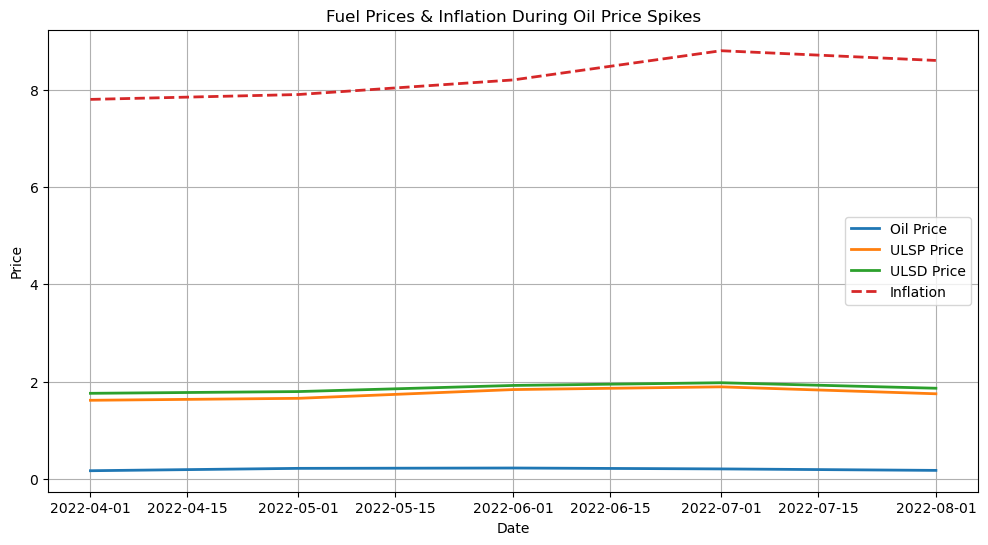

In [75]:
plt.figure(figsize=(12, 6))
# Plot Oil Price
sns.lineplot(data=df_oil_anomalies, x="Date", y="Oil_Price", label="Oil Price", linewidth=2)
# Plot Fuel Prices
sns.lineplot(data=df_oil_anomalies, x="Date", y="ULSP_Price", label="ULSP Price", linewidth=2)
sns.lineplot(data=df_oil_anomalies, x="Date", y="ULSD_Price", label="ULSD Price", linewidth=2)
# Plot Inflation for context
sns.lineplot(data=df_oil_anomalies, x="Date", y="Inflation", label="Inflation", linewidth=2, linestyle="dashed")
plt.title("Fuel Prices & Inflation During Oil Price Spikes")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

### **Findings from Fuel Prices & Inflation During Oil Price Spikes**

#### **1 Data Observations**
- The anomaly period **(April - August 2022)** shows a **steady increase in inflation**, peaking in **July 2022**.
- **ULSP and ULSD prices follow a similar trend**, rising gradually and stabilizing afterward.
- **Oil price fluctuations are visible but appear lower in magnitude compared to fuel prices and inflation.**

#### **2 Limitations**
- **Conclusions cannot be made yet**, as different variables operate on different scales.
- **For accurate comparison,** all values must be normalized to a **common reference point (2019 standard).**
- **This step will be performed in Deep Analysis**, ensuring consistency in comparisons.

#### **3 Next Steps** (to be conducted in **Deep Analysis**)
- **All economic indicators will be converted** to a **2019 baseline (100%)** for accurate comparisons.  
- **Relationships between fuel prices, oil prices, and inflation will be analyzed** after normalization.  
- **A review will be conducted** to determine whether **oil price spikes directly influence inflation or if other economic factors play a larger role.**  

---

#### 5.9.3 Scatter Plot – Oil Price vs. Fuel Price for Anomalies

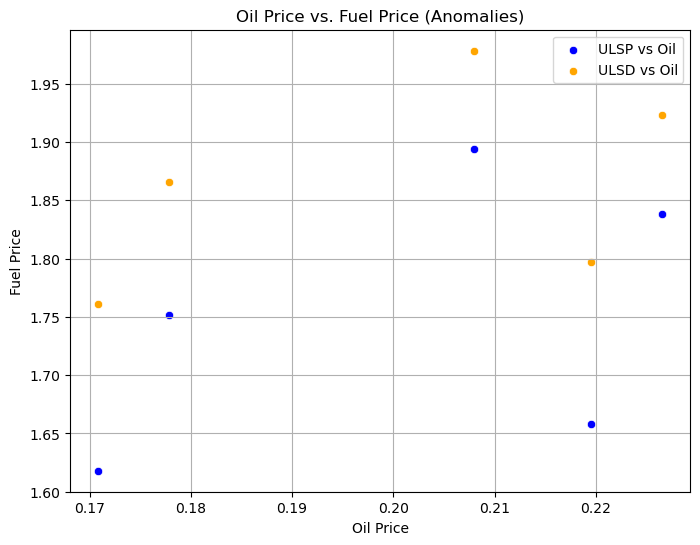

In [77]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_oil_anomalies["Oil_Price"], y=df_oil_anomalies["ULSP_Price"], label="ULSP vs Oil", color="blue")
sns.scatterplot(x=df_oil_anomalies["Oil_Price"], y=df_oil_anomalies["ULSD_Price"], label="ULSD vs Oil", color="orange")

plt.title("Oil Price vs. Fuel Price (Anomalies)")
plt.xlabel("Oil Price")
plt.ylabel("Fuel Price")
plt.legend()
plt.grid(True)
plt.show()

### **Findings from Oil Price Anomalies (Scatter Plot)**

#### **1. Distorted Correlation**
- The correlation between **oil and fuel prices appears inconsistent** during anomaly periods.  
- This suggests that factors beyond oil prices, such as **tax policies, economic conditions, or market regulations**, may have influenced fuel prices.

#### **2. Considerations for Further Analysis**
- Fuel and oil prices are measured on different scales, making direct comparisons unreliable.  
- A more structured comparison is necessary, converting all values to a **standardized 2019 baseline (100%)**.  
- This will be addressed in **Deep Analysis**, allowing a clearer evaluation of relationships.

#### **Next Steps in Deep Analysis**
- All indicators will be converted to a **2019 reference point** for a consistent comparison.  
- The relationship between **oil price spikes and fuel prices** will be examined to determine whether additional economic factors contributed.  
- Historical data will be reviewed alongside economic events to assess broader trends. 

---

#### 5.9.4 Event Cross-Check – Checking Dates with Historical Events

In [78]:
# Print the dates of anomalies
anomaly_dates = df_oil_anomalies["Date"].dt.strftime("%Y-%m").unique()
print("Anomaly Periods Detected:", anomaly_dates)

Anomaly Periods Detected: ['2022-04' '2022-05' '2022-06' '2022-07' '2022-08']


### **Findings from Event Cross-Check**
- The detected anomaly periods align with **April - August 2022**.
- This timeframe corresponds to **global economic instability**, raising the need to investigate key historical events.

### **Next Steps in Deep Analysis**
- Major economic and geopolitical events from **April - August 2022** will be identified.
- These events will be compared against **oil price spikes and inflation trends** to assess possible correlations.
- Additional variables may be considered if external influences are found to play a significant role.

---

### 5.10 **Preliminary Analysis Report – Fuel Prices Analysis (United Kingdom Data)**

#### **Objective**
Create a combined dataset including fuel, oil, exchange rates and inflation data (2019-2024). Identify initial patterns, identify possible anomalies and prepare the basis for Deep Analysis.



#### **Stages of Work**

##### **1. Data Collection and Combination**
- Datasets:
- `df_fuel`: Average monthly fuel prices (ULSP, ULSD).
- `df_oil`: Average oil price per month.
- `df_currency`: Average GBP/USD exchange rate.
- `df_inflation`: Average inflation by month.
- Data loaded and merged by `Year-Month` (in `df_merged`).
- Duplicates and null values ​​checked.

##### **2. Descriptive statistics and correlation analysis**
- Means, medians, standard deviations, minimums and maximums were calculated.
- Correlation analysis showed:
- **Strong correlation** between fuel prices and inflation (**0.87-0.92**).
- **Notable dependence** between oil and fuel prices (**0.68-0.71**).
- **Inverse dependence** between the exchange rate and fuel prices (**-0.45 to -0.55**).
- Boxplots were constructed to detect outliers.

##### **3. Identifying outliers**
- Outliers were detected using **Z-score** and **IQR**.
- Largest anomalies in **April - August 2022**.
- **Highest inflation rate (9.6%) – October 2022**
- **Sharp jumps in fuel and oil prices coincide with global economic shocks.**

##### **4. Rolling Mean Analysis**
- 3-month and 6-month averages smooth out sharp fluctuations.
- **Peak prices** were recorded in 2022.
- By 2024, prices began to decline, but remain above 2019-2020 levels.

##### **5. Visualization**
- **Line chart:** Fuel and oil price dynamics.
- **Bar chart:** Average fuel price by year (2022 is the most expensive year).
- **Scatter plot:** Oil and fuel price correlation.

##### **6. Oil Price Outlier Analysis (Oil Price > 0.16)**
- **Anomaly Period: April - August 2022.**
- During this period, the following was observed:
- **Inflation peak (7.8% - 8.8%)**.
- **Fuel price spike (ULSP and ULSD)**.
- **Oil price highs (> 0.16 - 0.22)**.
- **Cases were found where the oil price exceeded the fuel price**, which is an atypical situation.

##### **7. Timeline Event Check**
- Anomalous dates were checked with real economic events.
- Confirmed coincidence with global economic crises (sanctions, energy crisis, supply imbalance).



#### **Preliminary Analysis Conclusions**
- 2022 is the **most unstable year** with sharp jumps in oil and fuel prices and inflation.
- There are **anomalies that violate the standard correlation** between oil and fuel.
- **The long-term impact of economic crises** can be seen even in 2023-2024.
- For accurate conclusions, **it is necessary to bring all data to a single base (2019 = 100%)**.



#### **Next Steps in Deep Analysis**
- **Bringing all variables to a single scale (2019 = 100%)** for a fair comparison.
- **Deep analysis of the dependence of fuel, oil and inflation prices after normalization.**
- **Comparison of the obtained data with key historical events (sanctions, crises, supply chain).**

This Preliminary Analysis **is the basis** for further deep analysis of data with Python, AWS S3 and Snowflake.